<a href="https://colab.research.google.com/github/LeandroCoelhos/desafio_flai/blob/main/Campanha_de_Marketing_de_Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center' >Campanha de Marketing de Banco</h1>



<img align='center' src="https://raw.githubusercontent.com/LeandroCoelhos/desafio_flai/main/data/TituloCompeti%C3%A7%C3%A3o.jpg">


---



Atualmente ouvimos muito falar de Machine Learning, mas você sabe o que é? Quais aplicações tem? Por onde começar? Esse projeto não promete responder a todas as suas perguntas, mas pode ser um bom ponto de partida e te ajudar com algumas implementações.

Como proposta para o 3º Desafio de Machine Learning da Flai, dado um conjunto de dados de uma campanha de marketing para prever se um cliente faria um depósito ou não. Esse é um problema comum em campanhas de marketing e a aplicação de machine learning em conjunto com a análise de dados nos ajudará a dizer qual clientes e em quais períodos devemos focar nossos esforços, para reduzir os custos e aumentar os lucros.

  O objetivo principal do desafio era modelar uma solução que apresentasse o melhor F1-Score na previsão de depósitos segundo os dados fornecidos. 

Vamos abordar aqui algumas técnicas de pré-processamento e de predição que nos levaram ao terceiro lugar na competição. Vamos tentar entender quais fatores levam um cliente a realizar um depósito ou não, tentando responder algumas perguntas sobre o perfil do cliente:
1. Fatores como Idade, Trabalho, nível de educação e estado civil tem alguma ligação com a realização de depósitos?
2. Se o cliente possui casa própria, é inadimplente e o saldo que possui em conta tem alguma representatividade na resposta?
3. Campanhas anteriores, números de contatos, meio do contato ou o mês de contato geram maior impacto sobre o cliente?

Para responder a essas perguntas e obtermos uma boa predição seguiremos algumas etapas:
* Entendimento do problema
* Obtenção dos dados
* Análise exploratória dos dados
* Pré-Processamento
* Modelagem
* Combinação de Modelos



**Resumo do que será abordado neste projeto**

Competição de classificação binária (se houve depósito ou não) a partir de um conjunto com variáveis qualitativas e quantitativas sem valores faltantes. Foi feita uma análise exploratória e manipulação das variáveis. Como método de validação foi utilizado o K-Fold (10-Folds) estratificado com a métrica F1-Score. Dentre os modelos de aprendizagem de máquina, se destacaram o Randon Forest, Support Vector Machine e Gradient Boosting. Para solução final foi utilizado a combinação destes três modelos com o método Hard, depois de um GridSearch dos melhores hiperparâmetros. O F1-Score alcançado: 69,63 %.

---
<img src="https://raw.githubusercontent.com/LeandroCoelhos/desafio_flai/main/data/CorpoCompeti%C3%A7%C3%A3o.jpg" />


---




#Sumário
1. Importação dos dados
2. Análise Exploratória
3. Pré-processamento
4. Modelagem
5. Busca por Melhores Hiperparâmetros
6. Combinação por votos
7. Submissão
8. Conclusões
9. Considerações

# 1 Importação dos dados



##1.1 Bibliotecas
Primeiro, devemos importar algumas bibliotecas. _Pandas_ e _Numpy_ para manipulação do Conjunto de Dados, _Seaborn_ e _Matplot_ para criação de gráficos.

In [96]:
import pandas as pd 
import numpy as  np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler #Para normalização de intervalos

#from sklearn.feature_selection import SelectFromModel #seleção de váriaveis pela importancia nos resultados
#from matplotlib.axes._axes import _log as matplotlib_axes_logger
#Algorítimos de aprendizagem
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 
from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

#Modelos de busca por melhores parâmetros de modelos
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time#contagem de tempo para execução de tarefas

##1.2 Importação do Conjunto de dados
O conjunto **Treino** contem a variável resposta de interesse (_term_depoisit_)  e o conjunto **Teste** contem todas as colunas do conjunto de treino, menos a variável resposta. O Treino é o conjunto que deve ser _predito_ pelo modelo criado e enviado para submissão da competição.

In [97]:
# importanto os conjuntos de dados disponíveis nesta mesma pasta Data
treino = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/desafio_flai/main/data/treino.csv')
sub = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/desafio_flai/main/data/teste.csv')

#2 Análise Exploratória de Dados


##2.1 Valores nulos e tipos de colunas

In [98]:
print("Valores no Conjunto de TREINO:\n")
print(treino.info())

Valores no Conjunto de TREINO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6500 non-null   int64 
 1   age           6500 non-null   int64 
 2   job           6500 non-null   object
 3   marital       6500 non-null   object
 4   education     6500 non-null   object
 5   default       6500 non-null   object
 6   balance       6500 non-null   int64 
 7   housing       6500 non-null   object
 8   loan          6500 non-null   object
 9   contact       6500 non-null   object
 10  day           6500 non-null   int64 
 11  month         6500 non-null   object
 12  campaign      6500 non-null   int64 
 13  pdays         6500 non-null   int64 
 14  previous      6500 non-null   int64 
 15  poutcome      6500 non-null   object
 16  term_deposit  6500 non-null   object
dtypes: int64(7), object(10)
memory usage: 863.4+ KB
None


In [99]:
print("\n\nValores no Conjunto da Submissão:\n")
print(sub.info())



Valores no Conjunto da Submissão:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1422 non-null   int64 
 1   age         1422 non-null   int64 
 2   job         1422 non-null   object
 3   marital     1422 non-null   object
 4   education   1422 non-null   object
 5   default     1422 non-null   object
 6   balance     1422 non-null   int64 
 7   housing     1422 non-null   object
 8   loan        1422 non-null   object
 9   contact     1422 non-null   object
 10  day         1422 non-null   int64 
 11  month       1422 non-null   object
 12  campaign    1422 non-null   int64 
 13  pdays       1422 non-null   int64 
 14  previous    1422 non-null   int64 
 15  poutcome    1422 non-null   object
dtypes: int64(7), object(9)
memory usage: 177.9+ KB
None


O comando "info" mostra o total de observações em cada coluna, bem como o tipo de dado daquela coluna, se é numérico ou texto. 

Ambos conjuntos de dados possuem a quantia de linhas que foram informadas pelo enunciado da competição (6500 treino, e 1422 submissão). Mostrando que não há dados faltantes. Caso houvesse, poderíamos utilizar a média ou a mediana para preencher esses dados para os numéricos, ou utilizar um algoritmo, como o KNN para preencher esses dados com uma predição no próprio conjunto.

Podemos ver que há variáveis numéricas (int64) e string (object). Muitos algoritmos não suportam strings, por isso precisaremos transformar essas colunas futuramente.

##2.2 Vizualização do Conjunto de dados
Como o objetivo é tentar prever a realização de depósito, trabalharemos apenas com o conjunto de dados de Treinamento (que possui a variável resposta) para realizar o treinamento de algoritmos supervisionados.

O comando _head_ oferece as primeiras linhas do conjunto de dados.



In [100]:
treino.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit
0,0,46,management,divorced,tertiary,no,14481,yes,no,unknown,30,may,1,-1,0,unknown,yes
1,1,37,management,single,tertiary,no,457,yes,no,cellular,1,apr,3,-1,0,unknown,no
2,2,34,blue-collar,single,secondary,no,1698,yes,no,unknown,27,may,7,-1,0,unknown,no
3,3,45,unemployed,single,secondary,no,33,no,no,cellular,5,feb,1,-1,0,unknown,no
4,4,31,management,married,tertiary,no,131,no,no,cellular,18,feb,2,-1,0,unknown,yes


##2.3 Separando colunas categóricas e numéricas
Vamos mapear o conjunto de dados em colunas do tipo _objeto_ e as numericas (_int64_).

Faremos essa análise separadamente, pois para cada tipo de coluna traz uma informação diferente dos dados.


In [101]:
coluna_numerica = treino.columns[treino.dtypes == "int64"] #Colunas de variáveis numericas
coluna_object = treino.columns[treino.dtypes == "object"] #Colunas do tipo numéricas

###2.3.1 Colunas Categóricas

Vamos fazer uma contagem das observações e categorias de cada coluna, para termos uma noção de como nosso conjunto de dados esta distribuido.


In [102]:
for i in coluna_object:
  print("Coluna: ",i)
  print(treino[i].value_counts(), "\n")

Coluna:  job
management       1473
blue-collar      1240
technician       1045
admin.            748
services          579
retired           397
self-employed     240
unemployed        219
entrepreneur      188
student           171
housemaid         162
unknown            38
Name: job, dtype: int64 

Coluna:  marital
married     3686
single      2035
divorced     779
Name: marital, dtype: int64 

Coluna:  education
secondary    3220
tertiary     2117
primary       893
unknown       270
Name: education, dtype: int64 

Coluna:  default
no     6403
yes      97
Name: default, dtype: int64 

Coluna:  housing
yes    3253
no     3247
Name: housing, dtype: int64 

Coluna:  loan
no     5621
yes     879
Name: loan, dtype: int64 

Coluna:  contact
cellular     4634
unknown      1445
telephone     421
Name: contact, dtype: int64 

Coluna:  month
may    1720
aug     918
jul     889
jun     746
nov     604
apr     578
feb     381
oct     211
jan     137
mar     113
sep     113
dec      90
Name: mon


Agora temos uma noção de como estão distribuídas as categorias.
É possível ver que a coluna _default_ (inadimplentes) tem uma relação de menos de 2% dos dados como inadimplentes. Outras colunas também apresentam uma grande concentração em uma única categoria, vamos fazer uma análise gráfica para tirar mais algumas informações.


####2.3.1.1 Análise Gráfica Variáveis Categóricas
Aqui vamos buscar relações entre a chance de realizar o depósito com alguma das colunas categóricas. 
Essa visão nos permite inferir algumas informações sobre o impacto de cada categoria sob a variável resposta de interesse (_term_deposit_).

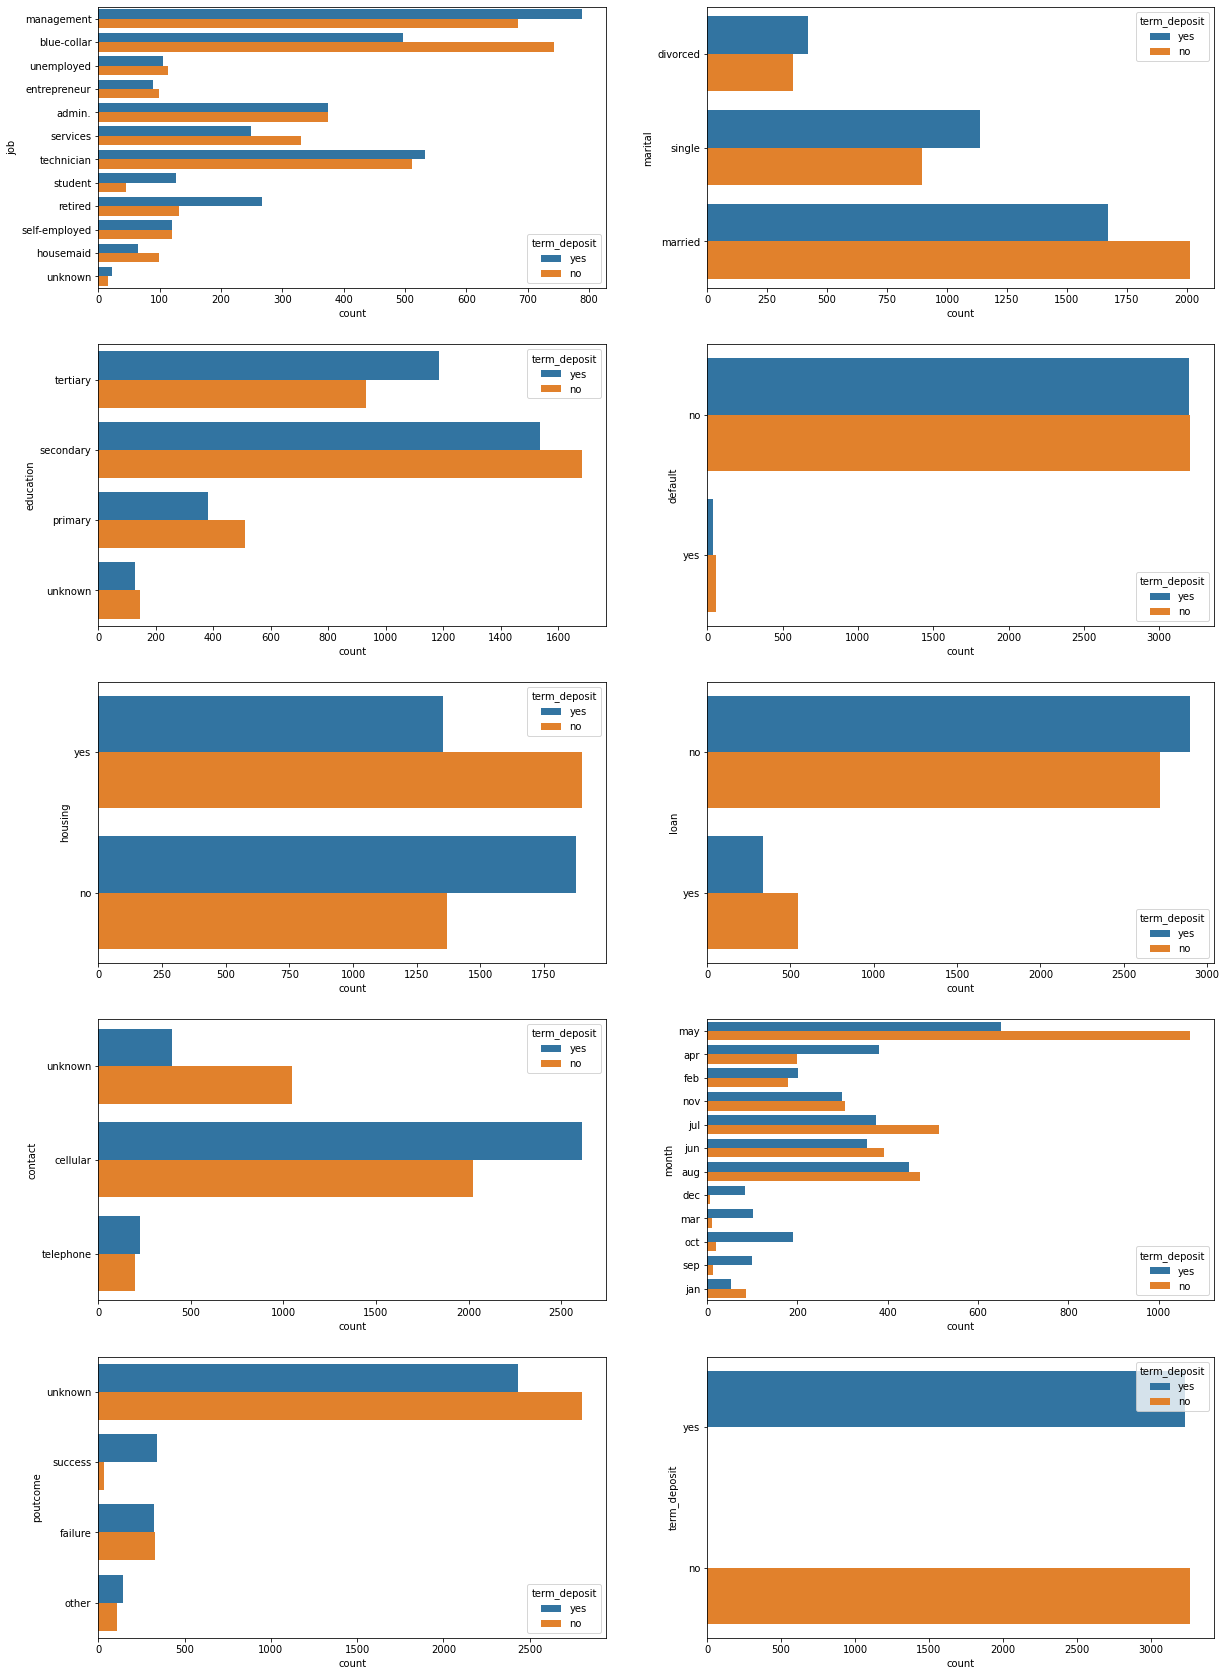

In [103]:
f, ax = plt.subplots(figsize=(20, 30))
for i in range(1,11):
  plt.subplot(5,2,i)
  sns.countplot(data = treino, y=coluna_object[i-1], hue='term_deposit')


Podemos observar que aqueles que não tem casa própria (_housing_) tem uma maior chance de realizar um depósito. 

Também notamos essa relação no tipo de emprego (_job_), em que _blue collar_ tem uma chance menor de realizar o depósito.

Observamos também que  solteiros tem maior chance de realizar um depósito, se comparado com os casados, que tem menor chance.

Quanto as informações relacionadas a campanha, vemos que o meio de contato e o mês em que a campanha foi realizada tem pesos consideráveis para variável resposta.

Já para se a pessoa é inadiplente  ou não (_default_) temos uma relação praticamente neutra.

###2.3.2 Colunas Numéricas

####2.3.2.1 Gráfico Variáveis numericas
Para as variáveis numéricas faremos um gráfico que criar pequenos agrupamentos de valores parecidos e ver sua representatividade no conjunto de dados ao mesmo tempo que analisamos comparativamente com a variável resposta.

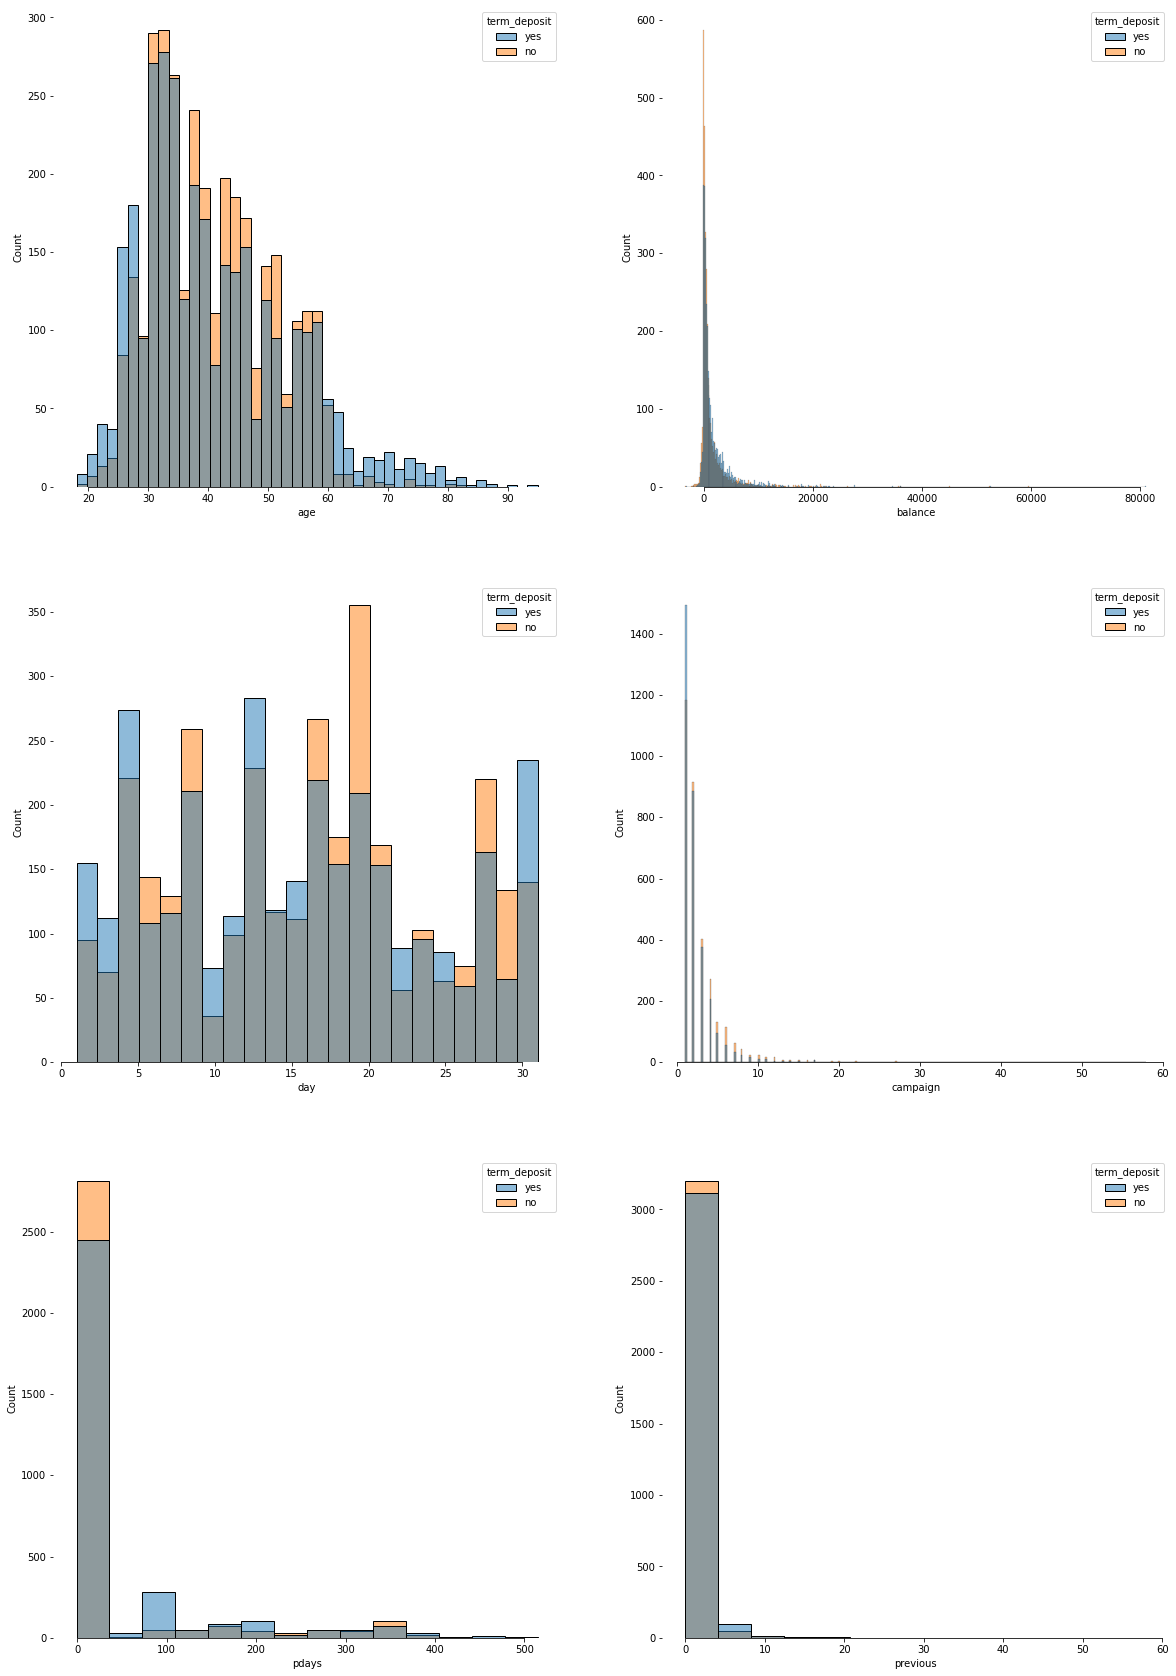

In [104]:
f, ax = plt.subplots(figsize=(20, 30))
for i in range(1,7):
  plt.subplot(3,2,i)
  sns.histplot(treino, x=coluna_numerica[i], hue='term_deposit')
  ax.xaxis.grid(True)
  sns.despine(trim=True, left=True)

Devido a grande amplitude de alguns dados, a interpretação dos gráficos fica um pouco prejudicada, mas podemos observar que para a idade (_age_) a maioria dos clientes se encontra entre os 30 e 50 anos, sendo mais propensos a não realizarem o depósito entre os 30 e os 60 anos. Nas outras faixas predominam a realização de depósito.

Para alguns dias do mês verificamos a mesma propensão, entretanto esta é uma variável que tem ligação com o mês, então precisamos ter cuidado com variáveis relacionadas a outras.


####2.3.2.2 Identificando Outliers
Vamos utilizar um gráfico boxplot para vizualizar a distribuição dos dados em suas faixas de valores.

A faixa central do gráfico mostra a mediana (termo central), os quartis limitados pela caixa, e os valores muito acima ou muito baixo dos quartis.

Essa análise nos ajuda a identificar valores muito discrepantes em relação aos demais, e onde se concentram a maioria dos valores.


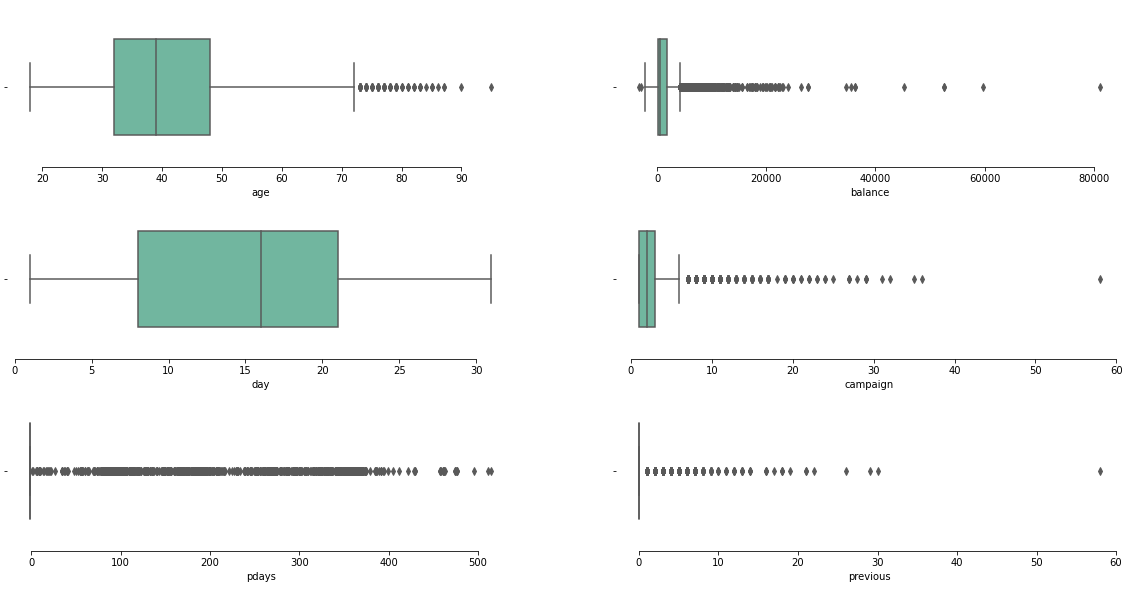

In [62]:
f, ax = plt.subplots(figsize=(20, 10))

for i in range(1,7):
  plt.subplot(3,2,i)
  sns.boxplot(x = treino[coluna_numerica[i]], width=.6, palette="BuGn")
  ax.xaxis.grid(True)
  ax.set(ylabel="")
  sns.despine(trim=True, left=True)


O saldo em conta (_balance_) possui 90% dos valores em uma faixa abaixo de 5 mil, com a média concentrada em valores próximos de zero e alguns valores acima dos 5 mil. Para esses clientes com um grande saldo em conta, pode ser interessante a segmentação bem como para clientes com valores de saldo negativo, e implementar estratégias de marketing diferentes.

Aqui vemos as colunas que se referem ao contato anterior com o cliente centradas em valores baixos. Devemos fazer uma comparação entre elas e descobrir se há alguma relação.

####2.3.2.3 Identificação de uma particularidade nos dados

In [63]:
pday = treino['pdays'].value_counts()[0:3,] #retorna os valores mais frequentes
prev = treino['previous'].value_counts()[0:3,]
pout = treino['poutcome'].value_counts()[0:3,]
print("3 valores mais frequentes em:\nPdays\n", pday, "\nPrevious\n", prev, "\nPoutcome\n", pout)

#Relacionando essas 3 colunas com o valor mais frequente
relacao = treino[(treino['pdays'] == -1) & (treino['previous'] == 0) & 
       (treino['poutcome'] == 'unknown')]['term_deposit'].count()
print("\nEsses valores aparecem em: ", relacao, "  linhas simultaneamente") 

3 valores mais frequentes em:
Pdays
 -1     5231
 91      23
 92      21
Name: pdays, dtype: int64 
Previous
 0    5231
1     488
2     324
Name: previous, dtype: int64 
Poutcome
 unknown    5233
failure     650
success     369
Name: poutcome, dtype: int64

Esses valores aparecem em:  5231   linhas simultaneamente




Como parte do entendimento do problema de negócio, foi possível inferir que as colunas _pdays, pouctome_ e _ previous_ apresentam mais de 5200 observações "iguais" e simultâneas. Essas colunas se referem aos: 
>* Dias desde o último contato;
>* Resultados da campanha de marketing anterior;
>* Números de contatos realizados antes da campanha atual.

Esse resultado faz sentido pois se é um cliente novo, faz sentido ele não ter sido contatado em uma campanha anterior (pdays -1) e portanto, não tem resultado da campanha anterior (campaign 0) e portanto nenhuma quantia de contatos prévio (previous 0).

#3 Pré-Processamento
Com a de exploração de dados finalizada, conseguimos tirar boas conclusões do conjunto de dados e com isso determinar possíveis abordagens para o pré-processamento.

Vamos realizar uma cópia do conjunto de dados e, a cada etapa, gerar um novo conjunto modificado. Quando o conjunto de dados é pequeno, manter uma cópia da etapa anterior é benéfico para que possamos voltar algumas etapas sem precisar rodar todo o código novamente, mas para grandes conjuntos isso pode se tornar um problema, devido a demanda por armazenamento.



In [64]:
data_treino = treino.iloc[:,1:] #a primeira coluna serve como indice interno, não precisamos dela
data_sub = sub.iloc[:,1:] #

print("Conjunto de dados de Treino. Linas X Colunas ", data_treino.shape)
print("Conjunto de dados para submissão. Linhas X Colunas: ", data_sub.shape)
data_treino.head()#mostra as primeiras linhas do conjunto

Conjunto de dados de Treino. Linas X Colunas  (6500, 16)
Conjunto de dados para submissão. Linhas X Colunas:  (1422, 15)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit
0,46,management,divorced,tertiary,no,14481,yes,no,unknown,30,may,1,-1,0,unknown,yes
1,37,management,single,tertiary,no,457,yes,no,cellular,1,apr,3,-1,0,unknown,no
2,34,blue-collar,single,secondary,no,1698,yes,no,unknown,27,may,7,-1,0,unknown,no
3,45,unemployed,single,secondary,no,33,no,no,cellular,5,feb,1,-1,0,unknown,no
4,31,management,married,tertiary,no,131,no,no,cellular,18,feb,2,-1,0,unknown,yes


##3.1 Tratando Outliers

Faremos a retirada dos outliers acima ou abaixo do IQR Intervalo Inter-Quartil), para a coluna _campaign_.


>_A retirada de valores discrepantes nem sempre é a melhor opção, entretanto está se mostrou a melhor abordagem depois dos testes com a retirada de _outliers_ de outras colunas e em outras faixas de valores IQR, bem como sem nenhum tratamento._


In [65]:
#retira os outliers da coluna Campaign
numerical_features=['campaign']
for cols in numerical_features:
    Q1 = data_treino[cols].quantile(0.25) #guarda o valor do quartil de 25%
    Q3 = data_treino[cols].quantile(0.75) #guarda o valor do quartil de 75% dos dados
    IQR = Q3 - Q1  #calcula o valor do IQR   

    filter = (data_treino[cols] >= Q1 - 1.5 * IQR) & (data_treino[cols] <= Q3 + 1.5 *IQR) #cria o filtro que diz quais valores serão permitidos
    data_treino_out = data_treino.loc[filter]

data_treino_out.shape #mostra a quantidade final de colununas

(6124, 16)

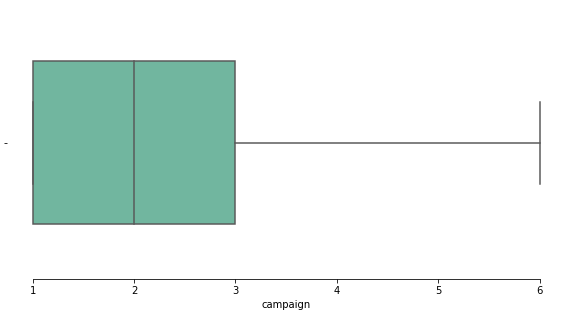

In [66]:
#Todos os resultados acima de 6 de campaing foram retirados
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x = data_treino_out['campaign'], width=.6, palette="BuGn")
ax.set(ylabel="")
sns.despine(trim=True, left=True)

##3.2 Mapeando colunas
 Como mencionado, é preciso que todas as colunas do tipo _objetc_, ou seja, aquelas que possuem texto sejam transformadas em colunas numéricas para que os modelos de machile learnin possam funcioar. 

Vamos transformar as colunas categóricas que possuem apenas as respostas SIM e NÃO em 
"0" para NÃO e "1" para SIM.




In [ ]:
#Mapeando em 0  e 1 as colunas bivariadas comum a todos
data_treino_map = data_treino_out.copy()
data_treino_map['default'] = data_treino_map['default'].map({'yes': 1, 'no':0})
data_treino_map['housing'] = data_treino_map['housing'].map({'yes': 1, 'no':0})
data_treino_map['loan'] = data_treino_map['loan'].map({'yes': 1, 'no':0})
data_treino_map['term_deposit'] = data_treino_map['term_deposit'].map({'yes': 1, 'no':0})
data_treino_map.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit
0,46,management,divorced,tertiary,0,14481,1,0,unknown,30,may,1,-1,0,unknown,1
1,37,management,single,tertiary,0,457,1,0,cellular,1,apr,3,-1,0,unknown,0
3,45,unemployed,single,secondary,0,33,0,0,cellular,5,feb,1,-1,0,unknown,0
4,31,management,married,tertiary,0,131,0,0,cellular,18,feb,2,-1,0,unknown,1
5,35,management,married,tertiary,0,646,1,0,cellular,18,nov,2,-1,0,unknown,0


##3.3 Normalizando os valores

Para um melhor desempenho dos algoritimos valos padronizar os valores, para que eles tenham a mesma faixa de valores. Isso é preciso para que alguns dados com valores muito altos não sejam interpretados como mais importantes que outros dados. Por isso vamos tentar deixar todas as colunas com faixas de valores similares entre -2 e 2.

> Por exemplo, a coluna _Balance_ possui valores de -3000 a +80000, enquanto a coluna _campaign_ possui valores entre 1 e 300. Para os algoritmos os valores de _balance_ podem ser interpretados com maior importância (peso) que os valores de _campaing_, o que não é nescessarimanete verdade.

Utilizaremos a função _StandardScaler_. Onde para cada entrada de cada coluna é subtraída a média da coluna e divido pelo desvio padrão daquela coluna. Isso faz com que não percamos informação durante a transformação, mantendo a essência do dado.

In [ ]:
sc = StandardScaler()
data_treino_out_norm = data_treino_map.copy().reset_index(drop=True)#Precisa Reiniciar o index devido ao tratamento de outliers que retirou colunas

aux0 = sc.fit_transform(data_treino_out_norm[['age','balance', 'pdays', 'previous', 'day']])#faz o ajuste, calculo da média e do desvio padrão. (- a mpedia) / desvio padrão
aux1 = pd.DataFrame(aux0, columns = ['idade', 'Saldo_conta', 'dias_Contato', 'Previo', 'dia'])#transforma num data frame o numpy array e adicionado ao data frame
data_treino_out_norm = pd.concat([data_treino_out_norm, aux1], axis = 1)#concatena com o o conjunto de dados
data_treino_out_norm.drop(['age','balance', 'pdays', 'previous', 'day'], axis = 1, inplace = True) #dropa as colunas antigas do conjunto de dados
data_treino_out_norm.head(5)

,job,marital,education,default,housing,loan,contact,month,campaign,poutcome,term_deposit,idade,Saldo_conta,dias_Contato,Previo,dia
0,management,divorced,tertiary,0,1,0,unknown,may,1,unknown,1,0.444481,4.009700,-0.432457,-0.307291,1.755331
1,management,single,tertiary,0,1,0,cellular,apr,3,unknown,0,-0.345650,-0.340459,-0.432457,-0.307291,-1.736652
2,unemployed,single,secondary,0,0,0,cellular,feb,1,unknown,0,0.356688,-0.471981,-0.432457,-0.307291,-1.254999
3,management,married,tertiary,0,0,0,cellular,feb,2,unknown,1,-0.872403,-0.441582,-0.432457,-0.307291,0.310373
4,management,married,tertiary,0,1,0,cellular,nov,2,unknown,0,-0.521234,-0.281832,-0.432457,-0.307291,0.310373


##3.4 Testando abordagens distintas
A maioria dos algoritmos de Machine Learning não suportam entradas de valores que não sejam numéricos, por isso precisamos transformar todos os dados deste tipo em números. Para isso tentaremos fazer algumas transformações diferentes e ver qual tem o melhor resultado F1-Score. Então tentaremos:
1. Transformar todas as categorias em números;
2. Transformar cada categoria em uma nova coluna (Dummy);
3. Fazer uma combinação destas duas.



###3.4.1 Transformando variáveis Categóricas em numéricas
Vamos simplesmente identificar as categorias presentes em cada coluna e atribuir um número ordinal a ela. 

Para a coluna _marirtal_, por exemplo, transformaremos casado em 0, solteiro em 1 e divorciado em 2.

Observe que ao final só temos números nas colunas.


In [ ]:
data_treino_out_norm_num = data_treino_out_norm.copy()

data_treino_out_norm_num['job'] = data_treino_out_norm_num['job'].map({'management': 0, 'blue-collar':1, 
                                                                     'technician': 2, 'admin.': 3, 'services': 4, 
                                                                     'retired': 5, 'self-employed': 6, 'unemployed': 7, 
                                                                     'entrepreneur': 8, 'student': 9, 'housemaid': 10,
                                                                     'unknown': 11})
data_treino_out_norm_num['marital'] = data_treino_out_norm_num['marital'].map({'married': 0, 'single': 1, 'divorced': 2})
data_treino_out_norm_num['education'] = data_treino_out_norm_num['education'].map({'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3})
data_treino_out_norm_num['contact'] = data_treino_out_norm_num['contact'].map({'cellular': 1, 'unknown':0, 'telephone': 2})
data_treino_out_norm_num['month'] = data_treino_out_norm_num['month'].map({'jan': 0, 'feb': 1,'mar': 2, 'apr': 3,
                                                                         'may': 4, 'jun': 5,'jul': 6, 'aug': 7,
                                                                         'sep': 8, 'oct': 9,'nov': 10, 'dec': 11,})
data_treino_out_norm_num['poutcome'] = data_treino_out_norm_num['poutcome'].map({'unknown': 0, 'failure': 1, 'success': 2, 'other': 3})

data_treino_out_norm_num.head()

,job,marital,education,default,housing,loan,contact,month,campaign,poutcome,term_deposit,idade,Saldo_conta,dias_Contato,Previo,dia
0,0,2,2,0,1,0,0,4,1,0,1,0.444481,4.009700,-0.432457,-0.307291,1.755331
1,0,1,2,0,1,0,1,3,3,0,0,-0.345650,-0.340459,-0.432457,-0.307291,-1.736652
2,7,1,1,0,0,0,1,1,1,0,0,0.356688,-0.471981,-0.432457,-0.307291,-1.254999
3,0,0,2,0,0,0,1,1,2,0,1,-0.872403,-0.441582,-0.432457,-0.307291,0.310373
4,0,0,2,0,1,0,1,10,2,0,0,-0.521234,-0.281832,-0.432457,-0.307291,0.310373


###3.4.2 Dummy das colunas
Ao invés de atribuir um valor arbitrário, vamos simplesmente criar uma nova coluna para aquela categoria atribuindo o valor 1 para sim e 0 para não.

Para a mesma coluna _marital_, criaremos três novas colunas: _marital_married, marital_silgle_ e _marital_divorced_. Sendo atribuídos o valor 1 a apenas uma destas colunas, indicando se a pessoa é solteira, casada ou divorciada em colunas diferentes.

Isso nem sempre é uma boa prática, pois acaba gerando muitas colunas novas, deixando um conjunto de dados muito maior.

In [ ]:
data_treino_out_norm_dumi = data_treino_out_norm.copy()
data_treino_out_norm_dumi = pd.get_dummies(data_treino_out_norm_dumi, columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
data_treino_out_norm_dumi.head()

,default,housing,loan,campaign,term_deposit,idade,Saldo_conta,dias_Contato,Previo,dia,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,1,1,0.444481,4.009700,-0.432457,-0.307291,1.755331,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,3,0,-0.345650,-0.340459,-0.432457,-0.307291,-1.736652,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0.356688,-0.471981,-0.432457,-0.307291,-1.254999,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,2,1,-0.872403,-0.441582,-0.432457,-0.307291,0.310373,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,2,0,-0.521234,-0.281832,-0.432457,-0.307291,0.310373,...,0,0,0,1,0,0,0,0,0,1


Agora temos um conjunto totalmente numérico, mas em contrapartida temos 48 colunas, 32 colunas a mais que as 16 inicial.

In [ ]:
data_treino_out_norm_dumi.shape

(6124, 48)

###3.4.3 Abordagem mista
Por fim, faremos uma abordagem mista das técnicas, transformando algumas colunas em numéricas e criaremos algumas novas colunas. 

Além disso, ao invés de criar números arbitrários para as categorias, irei atribuir "pesos" de acordo com o número de ocorrências no conjunto de dados total. Isto é, farei a contagem para cada observação e atribuirei esse número aquela categoria.

Para a coluna _marital_, ao invés de atribuir 1 ,2 ou 3 de acordo com a categoria de casado, divorciado ou solteiro, irei contar quantas vezes o estado casado aparece, por exemplo, e atribuirei esse número de observações a ele.

In [ ]:
data_treino_out_norm_mista = data_treino_out_norm.copy()
#Numerificando a coluna month de forma convencional
data_treino_out_norm_mista['month'] = data_treino_out_norm_mista['month'].map({'jan': 0, 'feb': 1,'mar': 2, 'apr': 3,
                                                                         'may': 4, 'jun': 5,'jul': 6, 'aug': 7,
                                                                         'sep': 8, 'oct': 9,'nov': 10, 'dec': 11,})
#Atribuindo "Pesos" a variáeis categóricas antes de numerificar
#faz a contagens de observações em cada coluna
data_treino_job = data_treino_out_norm_mista['job'].value_counts().to_dict()
data_treino_edu = data_treino_out_norm_mista['education'].value_counts().to_dict()
data_treino_mar = data_treino_out_norm_mista['marital'].value_counts().to_dict()
#Atribui o número de observações a respectiva categoria
data_treino_out_norm_mista['job']=data_treino_out_norm_mista['job'].map(data_treino_job)
data_treino_out_norm_mista['education']=data_treino_out_norm_mista['education'].map(data_treino_edu)
data_treino_out_norm_mista['marital']=data_treino_out_norm_mista['marital'].map(data_treino_mar)

#As colunas Contact e poutcome serão dumificadas
data_treino_out_norm_mista = pd.get_dummies(data_treino_out_norm_mista, columns= ['contact', 'poutcome'])
data_treino_out_norm_mista.head()

,job,marital,education,default,housing,loan,month,campaign,term_deposit,idade,...,dias_Contato,Previo,dia,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1377,737,2000,0,1,0,4,1,1,0.444481,...,-0.432457,-0.307291,1.755331,0,0,1,0,0,0,1
1,1377,1923,2000,0,1,0,3,3,0,-0.345650,...,-0.432457,-0.307291,-1.736652,1,0,0,0,0,0,1
2,210,1923,3021,0,0,0,1,1,0,0.356688,...,-0.432457,-0.307291,-1.254999,1,0,0,0,0,0,1
3,1377,3464,2000,0,0,0,1,2,1,-0.872403,...,-0.432457,-0.307291,0.310373,1,0,0,0,0,0,1
4,1377,3464,2000,0,1,0,10,2,0,-0.521234,...,-0.432457,-0.307291,0.310373,1,0,0,0,0,0,1


Devido a atribuição de pesos, estamos com uma amplitude muito alta em algumas colunas, por isso irei aplicar uma nova normalização apenas para essas colunas.

In [ ]:
#normalizando os dados novos
sc2 = StandardScaler()

aux2 = sc2.fit_transform(data_treino_out_norm_mista[['job','education', 'marital']])#faz o ajuste, calculo da média e do desvio padrão. (- a mpedia) / desvio padrão
aux3 = pd.DataFrame(aux2, columns = ['Ocupacao', 'escolaridade', 'civil'])#transforma num data frame o numpy array e adicionado ao data frame
data_treino_out_norm_mista = pd.concat([data_treino_out_norm_mista, aux3], axis = 1)#concatena com o o conjunto de dados
data_treino_out_norm_mista.drop(['job','education', 'marital'], axis = 1, inplace = True) #dropa as colunas antigas do conjunto de dados

#4 Modelagem

Com o pré-processamento terminado, vamos separar os 4 conjunto de dados para inserção nos modelos. 

Retomando o que fizemos até aqui:


*   1 - Fizemos a identificação das variáveis e as relações com o termo de deposito;
*   2 - Identificamos algumas colunas com outliers e separamos um conjunto com a remoção de outliers e outro sem tratamento;
*   3 - Utilizamos uma abordagem para lidar com as variáveis categóricas, uma transformando as categorias em números e outra criando para cada categoria uma nova coluna.



In [ ]:
#Colunas Numerificadas
Xtreino_1 = data_treino_out_norm_num.drop(['term_deposit'], axis=1)
Ytreino_1 = data_treino_out_norm_num['term_deposit'].to_list()
print(Xtreino_1.shape)
#Colunas dummificadas
Xtreino_2 = data_treino_out_norm_dumi.drop(['term_deposit'], axis=1)
Ytreino_2 = data_treino_out_norm_dumi['term_deposit'].to_list()
print(Xtreino_2.shape)
#Abordagem Mista com Pesos
Xtreino_3 = data_treino_out_norm_mista.drop(['term_deposit'], axis=1)
Ytreino_3 = data_treino_out_norm_mista['term_deposit'].to_list()
print(Xtreino_3.shape)

(6124, 15)
(6124, 47)
(6124, 20)


##4.1 Método

Como método de validação usarei 10-Folds (K-Fold) Estratificado repetindo 10 vezes o método. Isso tende a evitar um overfitting e trazer um modelo mais estável.

O K-Fold separa o conjunto de dados K partes iguais, utilizando K-1 delas para treinamento e a parte K para validar (testar) o modelo. Repetindo o processo até que todas as K partições tenham sido utilizadas tanto para treinamento quanto para teste. 


In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

##4.2 Métrica
Como parte da competição utilizaremos o F1-Score, que é uma média harmônica entre a precisão e a sensibilidade. Quando a Precisão estiver baixa, por mais que o Recall esteja alto, o F1-score dara um resultado baixo, e vice-versa. Isso possibilita que olhemos para uma única métrica ao invés de duas.


Aqui temos uma matriz de confusão, que indica os erros e os acertos do nosso modelo, comparando com o resultado esperado.

---
<img src="https://miro.medium.com/max/1876/1*s7VB26Cfo1LdVZcLou-e0g.png">

---
**Verdadeiro** é a predição correta do modelo. **Falso** é a precição errada do modelo.


>Sendo a _precision_:

$ precision = \frac{Vp}{Vp + Fp}$

>E o _recall_:  

$ recall = \frac{Vp}{Vp + Fn}$

Por fim o F1-Score:
$ F1 = 2.\frac{precision.recall}{precision + recall}$

##4.3 Melhor pré-processamento

Devido ao alto custo computacional de testar vários algoritmos, vou selecionar apenas o algoritmo que obteve o melhor desempenho nos testes anteriores realizados durante a competição.

In [ ]:
modelo_Grad = GradientBoostingClassifier() #Modelo
resultados = pd.DataFrame() #dataframe vazio para armazenar os resultados

#Abordagem Numerica
mol_Grad = cross_validate(modelo_Grad, Xtreino_1, Ytreino_1, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 1, n_jobs = -1)
dic = {'F1-Score': [mol_Grad['test_f1'].mean()], 'Precisão': [mol_Grad['test_precision'].mean()], 'Recall': [mol_Grad['test_recall'].mean()]}
resultados = pd.concat([resultados, pd.DataFrame(dic, index = ['Numerica'])])

#Abordagem Dummy
mol_Grad = cross_validate(modelo_Grad, Xtreino_2, Ytreino_2, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 1, n_jobs = -1)
dic = {'F1-Score': [mol_Grad['test_f1'].mean()], 'Precisão': [mol_Grad['test_precision'].mean()], 'Recall': [mol_Grad['test_recall'].mean()]}
resultados = pd.concat([resultados, pd.DataFrame(dic, index = ['Dummy'])])

#Abordagem Mista
mol_Grad = cross_validate(modelo_Grad, Xtreino_3, Ytreino_3, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 1, n_jobs = -1)
dic = {'F1-Score': [mol_Grad['test_f1'].mean()], 'Precisão': [mol_Grad['test_precision'].mean()], 'Recall': [mol_Grad['test_recall'].mean()]}
resultados = pd.concat([resultados, pd.DataFrame(dic, index = ['Mista'])])

resultados = resultados.sort_values('F1-Score', ascending=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.1s finished


In [ ]:
resultados.head(40)#Exibindo os resultados

,F1-Score,Precisão,Recall
Mista,0.683777,0.719822,0.651769
Numerica,0.681926,0.718763,0.649258
Dummy,0.677281,0.722191,0.638126


O pré-processamento misto teve um desempenho ligeiramente melhor do que a numerificação das colunas. Já a Dummy mostrou o pior resultado com o algoritmo testado.

Aqui vale uma ressalva, que dependendo do algoritmo base testado, outro conjunto poderia ter tido um resultado melhor. Entretanto, como buscamos os 3 melhores modelos para fazer uma combinação, os melhores resultados alcançados foram alcançados com os conjuntos numérico e misto na maioria dos casos.

##4.4 Melhores Modelos

Definido o melhor conjunto de dados pré-processados para a métrica F1-Score, vamos para a próxima etapa: buscar os melhores algoritmos para fazer uma combinação de modelos.

Essa é a segunda etapa que exige um grande poder computacional deste projeto, podendo levar um tempo considerável. Deixarei as saídas com os tempos de execução de cada algoritmos.

In [ ]:
#Nomes dos classificadores considerados
nome = [
    '5-Vizinhos Mais Próximos',
    '45-Vizinhos Mais Próximos',
    'Default-Vizinhos Mais Próximos',
    'Árvore de Decisão',
    'Regressão Logística', 
    'Análise Discriminante Linear',
    'Análise Discriminante Quadrática',
    'Bagging de Árvores',
    'Bagging de Regressão Logística',
    'Floresta Aleatória',
    'AdaBoost',
    'Extra Árvores',
    'Classificador Passivo Agressivo',
    'Gradient Boosting',
    'Gaussian Naive Bayes', 
    'Support Vector Machine (Linear)',
    'Support Vector Machine (RBF)',
    'Support Vector Machine (Poli.G3)',
    'Support Vector Machine (Sigmoid)',
    'Rede Neural Perceptron',
    'Rede Neural MLP (10)',
    'Rede Neural MLP (10,10)',
    'Rede Neural MLP (100)']

#Classificadores considerados
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    KNeighborsClassifier(n_neighbors = 45),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(), 
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    PassiveAggressiveClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(), 
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'poly'),
    SVC(kernel = 'sigmoid'),
    Perceptron(),
    MLPClassifier(hidden_layer_sizes=(10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(10,10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(100), max_iter = 1000)]

Definido os modelos, vamos agora colocar em um laço de repetição para percorrer todos com o conjunto de dados escolhido anteriormente.

Usaremos o mesmo método de validação K-Fold para mesma métrica F1.

In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)#Validação KFold Estratificado
resultados = pd.DataFrame() #dataframe vazio para guardar os resultados
i = 1
for i, modelo in enumerate(classifiers):
    print('Ajustando o modelo', nome[i])
    mol_testes = cross_validate(modelo, Xtreino_3, Ytreino_3, cv = validacao, 
                                scoring = ['accuracy','recall', 'f1', 'precision'],
                                verbose = 2, n_jobs = -1)
    #atribui as métricas para o dataframe para comparação
    acc = mol_testes['test_accuracy'].mean() #vamos guardar também a accuracy para efeitos de comparação
    f1s = mol_testes['test_f1'].mean()
    pre = mol_testes['test_precision'].mean()
    rec = mol_testes['test_recall'].mean()
    #Atribuindo os resultado ao dataframe resultados
    dic = {'F1-Score': [f1s], 'Precisão': [pre], 'Recall': [rec], 'Acurácia': [acc]}
    aux = pd.DataFrame(dic, index = [nome[i]])
    resultados = pd.concat([resultados, aux])


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo 5-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo 45-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Default-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Árvore de Decisão


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Regressão Logística


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Análise Discriminante Linear


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Análise Discriminante Quadrática


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Bagging de Árvores


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Bagging de Regressão Logística


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   55.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Floresta Aleatória


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   48.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo AdaBoost


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Extra Árvores


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   48.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Classificador Passivo Agressivo


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Gradient Boosting


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Gaussian Naive Bayes


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Support Vector Machine (Linear)


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Support Vector Machine (RBF)


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Support Vector Machine (Poli.G3)


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Support Vector Machine (Sigmoid)


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Rede Neural Perceptron


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Rede Neural MLP (10)


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Rede Neural MLP (10,10)


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Ajustando o modelo Rede Neural MLP (100)


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 15.8min finished


In [ ]:
resultados = resultados.sort_values('F1-Score', ascending=False) #organiza o dataframe segundo o F1
resultados.head(40)

,F1-Score,Precisão,Recall,Acurácia
Gradient Boosting,0.683783,0.718292,0.653185,0.693714
Support Vector Machine (Poli.G3),0.679508,0.644261,0.719274,0.655683
Floresta Aleatória,0.678338,0.706758,0.652670,0.685955
Support Vector Machine (RBF),0.675998,0.664639,0.688290,0.665316
Support Vector Machine (Linear),0.675903,0.595377,0.782338,0.619187
Análise Discriminante Linear,0.665774,0.640794,0.693244,0.646995
AdaBoost,0.665202,0.688965,0.643663,0.671470
Regressão Logística,0.664366,0.643574,0.687067,0.647944
Extra Árvores,0.663830,0.683386,0.645942,0.668175
Bagging de Regressão Logística,0.663777,0.643667,0.685912,0.647570


Podemos observar pelos tempos de execução, que os maiores tempos de treinamento ficaram por conta de modelos de redes neurais MLP e SVM, que não necessariamente, se saíram melhor que outros modelos menos custosos.

Por fim temos que o _Gradient Boosting_ ficou com o melhor F1-Score, seguidos do SVM e da Floresta Aleatória (_Randon Forest_). 

Vamos usar esses três modelos para fazer uma combinação _Hard_, mas antes vamos buscar seus melhores hyperparâmetros para que obtenham melhores resultados que seus algoritmos base.



### 4.4.1 Comparação Gráfica dos resultado

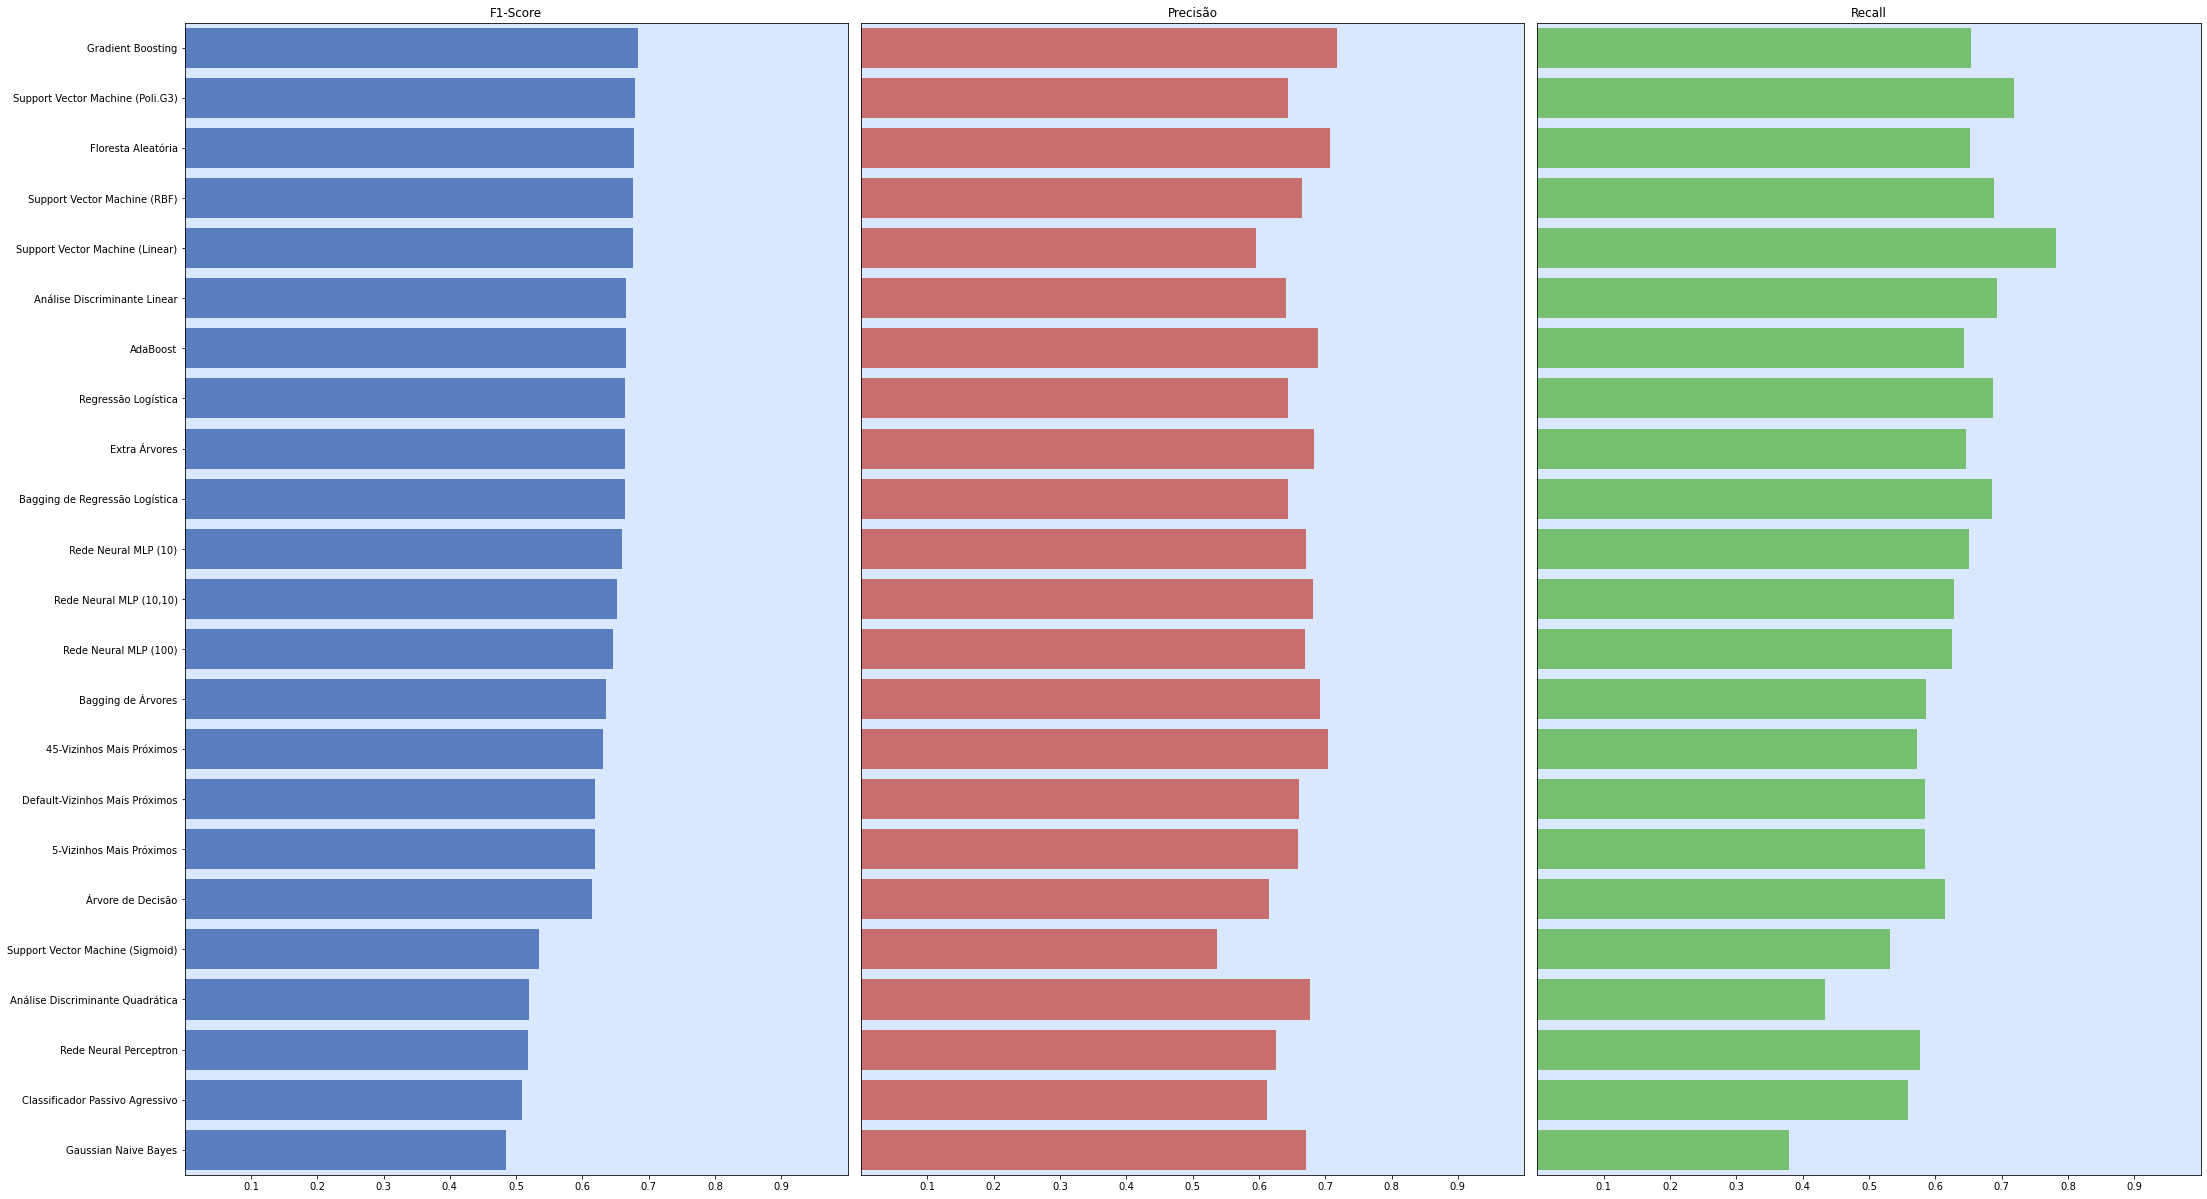

In [ ]:
#Gráficos relevantes
sns.set_color_codes("muted")
bgcolor = '#d9e7ff'
ticagem = [.1, .2, .3, .4, 0.5, .6,.7,.8,.9]
figura = plt.figure(figsize=(40,20)) 
figura.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.02, hspace=1)

plt.subplot(1, 3, 1)
plt.title('F1-Score')
acc = sns.barplot(x = resultados.iloc[:,0], y = resultados.index.values, color='b')
acc.axes.set_xlim([0, 1])
acc.xaxis.set_ticks(ticagem)
acc.set_facecolor(bgcolor)
plt.xlabel('')

plt.subplot(1, 3, 2)
plt.title('Precisão')
auc = sns.barplot(x = resultados.iloc[:,1], y = resultados.index.values, color='r')
auc.axes.get_yaxis().set_visible(False)
auc.axes.set_xlim([0, 1])
auc.xaxis.set_ticks(ticagem)
auc.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 3, 3)
plt.title('Recall')
f1 = sns.barplot(x = resultados.iloc[:,2], y = resultados.index.values, color='g')
f1.axes.set_xlim([0, 1])
f1.xaxis.set_ticks(ticagem)
f1.axes.get_yaxis().set_visible(False)
f1.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('') 

plt.show()
figura.savefig('medidas.pdf')#Salvando o gráfico

Um detalhe interessante é que a métrica F1-Score é uma média harmônica entre a Precisão e a Sensibilidade do modelo, por isso vemos que alguns modelos uma precisão maior, enquanto outros tem uma sensibilidade maior, alcançando quase os mesmos resultados do F1.

#5 Busca por Melhores Hiperparâmetros

Escolhido o melhor pré-processamento e melhores algoritmos vamos fazer a tunagem de hiperparâmetros utilizando a função GridSearch, que busca a combinação de todos os valores especificados e retorna aquele com o melhor desempenho para a métrica escolhida, que no nosso caso é o F1.

##5.1 Gradient Boosting

In [ ]:
parametros_Grad = { 'n_estimators' : np.arange(20,101,10), 
                    'learning_rate' : np.arange(0.01,0.32,0.03),
                    'max_depth': np.arange(3,10,3)
                 }

modeloGrad = GradientBoostingClassifier()
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

grid_Grad = GridSearchCV(modeloGrad, param_grid = parametros_Grad,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 1, n_jobs = -1)

grid_Grad.fit(Xtreino_3, Ytreino_3)
melhor_Grad = grid_Grad.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_Grad.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Grad.best_params_))


Fitting 100 folds for each of 297 candidates, totalling 29700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 60.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 84.9min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |


F1-Score: 0.6957
Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 20}



Os melhores parâmetros para o _Gradient_ levaram o modelo a alcançar o F1-Score de 69,57%. Um resultado muito bom se comparado com os outros modelos.

Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 20}

##5.2 Randon Forest

In [ ]:
profundidade = np.arange(2, 17, 2)
parametros = {   
                 'max_depth' : profundidade, #profundidade da floresta
                 #'n_estimators': [50, 150, 200], # Réplicas boostrap feitas
                 'max_samples' : [50, 150, 200],
                 'min_samples_split': [5,10,16,20,30],
                 'max_features': ['sqrt', 'auto', 'log2'], #minimo de amostras nas folhas
                 }

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
modelo = RandomForestClassifier()
grid_rf = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 1, n_jobs = -1)

grid_rf.fit(Xtreino_3, Ytreino_3)#Treina o algorítimo com as especificações acima buscando melhores paramêtros
melhor_rf = grid_rf.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_rf.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_rf.best_params_))


Fitting 100 folds for each of 360 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |


F1-Score: 0.6786
Melhores parâmetros: {'max_depth': 2, 'max_features': 'auto', 'max_samples': 200, 'min_samples_split': 16}



A _Randon Forest_ teve um desempenho bem parecido com os parâmetros bases, sem que os ajustes dos hiperparâmetros resultassem em melhores resultados.

Melhores parâmetros: {'max_depth': 2, 'max_features': 'auto', 'max_samples': 200, 'min_samples_split': 16}

##5.3 SVM (Suport Vector Machine)






In [ ]:
param_grid = {'C': [0.1, 1, 10] ,'gamma': [0.001, 0.01, 0.1, 'scale'], 'kernel': ['rbf', 'poly', 'linear']}
                  
modeloSVC = SVC()
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

grid_SVC = GridSearchCV(modeloSVC, param_grid = param_grid,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 1, n_jobs = -1)#n_jobs = usa VARIOS CLUSTERS

grid_SVC.fit(Xtreino_3, Ytreino_3)
melhor_SVC = grid_SVC.best_estimator_

print('\F1-Score: {:.4f}'.format(grid_SVC.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_SVC.best_params_))


Fitting 100 folds for each of 36 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 195.6min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 273.3min finished


\F1-Score: 0.6823
Melhores parâmetros: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}



Vemos que apesar do algoritmo base do SVM ter mostrado o _kernel poly_ como melhor, na busca _Grid_ o _kernel RBF_ levou a melhor.

Melhores parâmetros: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

---

#6 Combinação por Votos

Encontrado os melhores hiperparâmetros para os modelos, vamos combinar os 3 e fazer um teste antes de submetermos para competição.

In [ ]:
modelo_Grad = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 20)

modelo_Randon = RandomForestClassifier(max_depth = 2, max_features = 'auto', max_samples = 200, 
                                       min_samples_split = 16)

modelo_SVM = SVC(kernel = 'rbf', C = 0.1, gamma = 0.1)

In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

#LISTA DE MODELOS - Nome do modelo + instancia do modelo
modelos = [('Gradiente', modelo_Grad), ('Árvore', modelo_Randon),  ('SVM ', modelo_SVM)]
#modelo de votos soft implementado
modelo = VotingClassifier(modelos, voting = 'hard')

#medidas apuradas do modelo selecionado, vendo apenas a métrica F1-Score com o método kfold repetido
medidas = cross_validate(modelo, Xtreino_3, Ytreino_3, cv = validacao, scoring = 'f1', verbose = 2, n_jobs = -1)
medidas['test_score'].mean()#resultado para cada iteração e para cada repetição

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.1min finished


0.6959221060664104

A combinação de modelos sugere um leve aumento se comparado com o _GradientBoosting_ sozinho. 

Mas foi um aumento significante para a colocação final no desafio.

#7 Submissão

Agora que temos os melhores modelos e as melhores técnicas para tratamento do conjunto de dados, vamos aplicar o mesmo pré-processamento ao conjunto de dados da submissão, treinar os modelos com todo conjunto de dados de teste e preparar o arquivo de submissão para a competição.

##7.1 Pré-Processamento Submissão

In [ ]:
#Fazendo o Mapeamento de categorias bivariadas
data_sub_map = data_sub.copy()
data_sub_map['default'] = data_sub_map['default'].map({'yes': 1, 'no':0})
data_sub_map['housing'] = data_sub_map['housing'].map({'yes': 1, 'no':0})
data_sub_map['loan'] = data_sub_map['loan'].map({'yes': 1, 'no':0})

Aplicando o tratamento misto para variáveis categóricas

Aqui vale destacar o _Data Liquid_, que é a influência dos dados de treinamento sobre o conjunto de dados da submissão, que não deveriam ter ligação. Isso porque, quando o conjunto de dados que você usa para treinar seu algoritmo tem ligação com o conjunto de dados que você usa para validar seu modelo, existe uma tendência do seu algoritmo não ter a independência teórica que deveria. Isto é, quando pegamos os "pesos" que atribuímos para _marital_ e só repassamos para o outro conjunto, este estará influenciado pelos valores gerados anteriormente.

Mas isso não é um problema, esse processo acaba sendo necessário na maioria das vezes e não compromete a capacidade de generalização dos algoritmos.

In [ ]:
data_sub_mista = data_sub_map.copy()
#Numerificando a coluna month de forma convencional
data_sub_mista['month'] = data_sub_mista['month'].map({'jan': 0, 'feb': 1,'mar': 2, 'apr': 3,
                                                                         'may': 4, 'jun': 5,'jul': 6, 'aug': 7,
                                                                         'sep': 8, 'oct': 9,'nov': 10, 'dec': 11,})
#Atribuindo "Pesos" a variáeis categóricas antes de numerificar
#Os pesos ja foram definidos no conjunto de treino, aqui só aplicarei esses valores ja calculados
data_sub_mista['job']=data_sub_mista['job'].map(data_treino_job)
data_sub_mista['education']=data_sub_mista['education'].map(data_treino_edu)
data_sub_mista['marital']=data_sub_mista['marital'].map(data_treino_mar)

#As colunas Contact e poutcome serão dumificadas
data_sub_mista = pd.get_dummies(data_sub_mista, columns= ['contact', 'poutcome'])
data_sub_mista.head()

In [ ]:
#Normalizando os valores
aux0 = sc.transform(data_sub_mista[['age','balance', 'pdays', 'previous', 'day']])#sem o fit, ele ja foi feito na etapa passada, sem vazamento de dados
aux1 = pd.DataFrame(aux0, columns = ['idade', 'Saldo_conta', 'dias_Contato', 'Previo', 'dia'])
data_sub_norm = pd.concat([data_sub_mista, aux1], axis = 1)
data_sub_norm.drop(['age','balance', 'pdays', 'previous', 'day'], axis = 1, inplace = True)


In [ ]:
#Aplicando a segunda normalização
aux2 = sc2.transform(data_sub_norm[['job','education', 'marital']])#faz o ajuste, calculo da média e do desvio padrão. (- a mpedia) / desvio padrão
aux3 = pd.DataFrame(aux2, columns = ['Ocupacao', 'escolaridade', 'civil'])#transforma num data frame o numpy array e adicionado ao data frame
data_sub_norm2 = pd.concat([data_sub_norm, aux3], axis = 1)#concatena com o o conjunto de dados
data_sub_norm2.drop(['job','education', 'marital'], axis = 1, inplace = True) #dropa as colunas antigas do conjunto de dados
data_sub_norm2.head()

#7.2 Fazendo a submissão

Agora vamos utilizar todo o conjunto de dados de teste para treinar novos modelos, fazer a combinação por votos e classificar as entradas do conjunto fornecido para submissão (1422 linhas). 

Guardaremos apenas as respostas (_term_deposit_) na mesma ordem que foi fornecida em um arquivo .csv. 



In [ ]:
modelos_sub = [('Gradiente', modelo_Grad), ('Árvore', modelo_Randon), ('SVM RBF', modelo_SVM_RBF),('Modelo Ada', modelo_Ada) , ('SVM Linear', modelo_SVM_Linear)]
modelo_sub = VotingClassifier(modelos_sub, voting = 'hard')

modelo_sub.fit(Xtreino_3, Ytreino_3)
pred_sub = modelo_sub.predict(data_sub_norm2)

In [ ]:

predicao_final = pd.DataFrame()
predicao_final['term_deposit'] = pred_sub
#Escrevendo CSV
predicao_final.to_csv('D:\Submissão.csv', index = False)

In [ ]:
predicao_final.info()

,term_deposit
count,1422.000000
mean,0.580872
std,0.493590
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#8 Conclusões
Durante a análise exploratória conseguimos identificar alguns fatores ligados ao tipo de cargo ocupado, que levam a uma maior taxa de depósito, ou o oposto. Essa relação também foi encontrada quanto ao estado civil do cliente. Mas nenhuma delas foi capaz de nos dizer isoladamente se o depósito do cliente teria uma chance absoluta de ocorrer ou não, por isso o emprego de modelos de machine learning se mostram uma ótima alternativa de relacionar informações.

Ainda na análise exploratória foi identificada uma redundância de informações ligadas a campanhas anteriores, que identificam clientes novos ou nunca contatados anteriormente, mas que não indicam se teriam maior sucesso de depósito ou não.

Grande parte dos clientes contatados em determinados dias sugerem maior chance de depósito, podendo o dia estar ligado com a data de recebimento do pagamento.

Nos meses do meio do ano (maio, junho e julho) estão concentradas a maior atividade da campanha, mas resultando em mais respostas negativas do que positivas, ao contrário de meses do fim de ano e de março, que tem maior resposta positiva a campanha. Os esforços da campanha deveriam ser redirecionados para esses meses para obter um melhor resultado.

A combinação dos modelos de _GradientBoosting, RandonForest e SVM_ obteve resultados melhores que qualquer um dos três algoritmos sozinhos, e apesar de apenas o _Gradient_ ter alcançado os 69% de F1, a combinação com modelos mais fracos levou a resultados melhores. Uma possibilidade é que enquanto alguns algoritmos obtiveram uma melhor precisão, outro teve um melhor _recall_.





#9 Considerações e Melhorias futuras

O alto custo computacional foi um fator limitante para este projeto, mas uma melhoria no pré-processamento se mostrou mais eficaz do que uma tunagem de hiperparâmetros, por exemplo. Isso mostra que a qualidade do conjunto de dados tem maior impacto no resultado final do que os algoritmos empregados.

A abordagem com "pesos" para algumas categorias pode ser bem arbitrário e depende muito do conjunto de dados, uma abordagem tomada aqui, pode não ser a melhor para outro conjunto.

O tratamento de outliers nem sempre é algo preciso, pode-se tentar diminuir esses valores pelos extremos dos quartis, ao invés de elimina-los.

Seria interessante relacionar as colunas dia e mês, e possivelmente fazer uma análise temporal deste problema.

Um possivem ajuste na campanha seria segmentar os clientes e passar a oferecer produtos ou fazer campanhas diferenciadas de acordo com os clientes que tem maior poder aquisitvo ou melhor estabilidade no emprego.

Deixarei aqui meu contato, para qualquer dúvida, sugestão ou crítica. Sempre será bem-vinda qualquer ajuda :)


---
* [Meu LinkedIn](https://www.linkedin.com/in/leandro-coelhos/) 
* [Meus Projetos podem ser vistos aqui](https://github.com/LeandroCoelhos)

---

As respostas estão de posse somente da Flai.

Foram limitadas as submissões para apenas 5 tentativas.

Para cada submissão foi tentada uma abordagem diferente. Esse projeto apresenta de forma resumida as técnicas empregadas ao longo de toda competição. 

<img src="https://raw.githubusercontent.com/LeandroCoelhos/desafio_flai/main/data/Placar%20FInal%20Flai.jpeg" />

